## Import Packages

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

## Load Data

In [20]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [21]:
print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


## Build Random Forest Model

In [22]:
X = iris.data[:, :2]  # Select the first two features (sepal length and sepal width)
y = iris.target

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [34]:
# Create a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=10, random_state=42, max_depth=3, min_samples_split=5)

# Fit the model to the data
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, min_samples_split=5, n_estimators=10,
                       random_state=42)

In [33]:
rf_model.score(X_test, y_test)

0.7666666666666667

In [35]:
y_pred = rf_model.predict(X_test)

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[12,  0,  0],
       [ 0,  4,  3],
       [ 0,  4,  7]], dtype=int64)

## Plot Random Forest

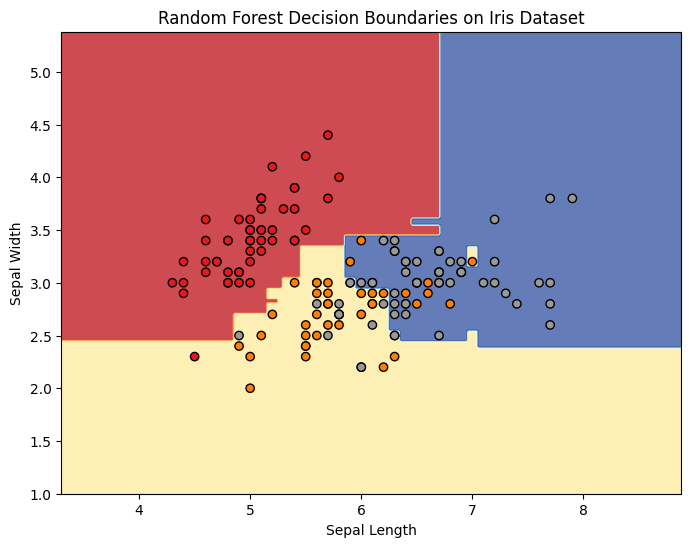

In [37]:
# Generate a grid of points in the feature space
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict the class for each grid point
Z = rf_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Set1)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Random Forest Decision Boundaries on Iris Dataset')
plt.show()

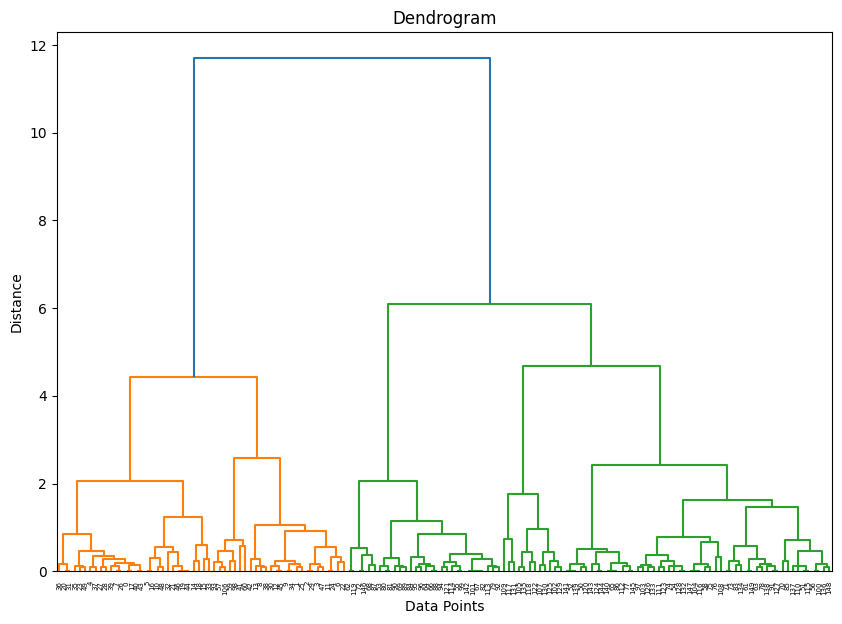

In [40]:
# Perform hierarchical clustering
Z = linkage(X, method='ward')
# Minimize the variance within each cluster when merging them

# Plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dendrogram(Z)
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

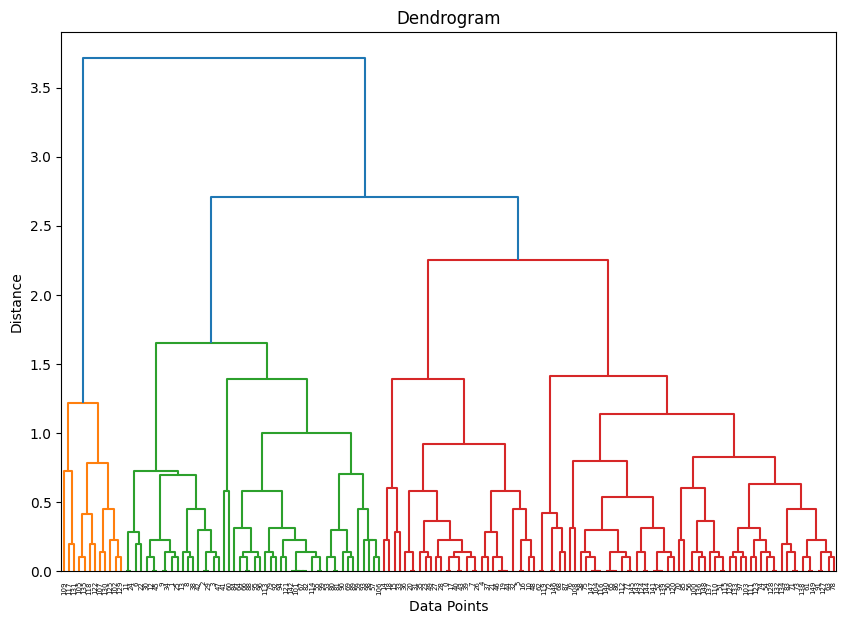

In [41]:
# Perform hierarchical clustering
Z = linkage(X, method='complete') 
# Calculates the maximum distance between observations of different clusters
# Lead to uneven cluster sizes.

# Plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dendrogram(Z)
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

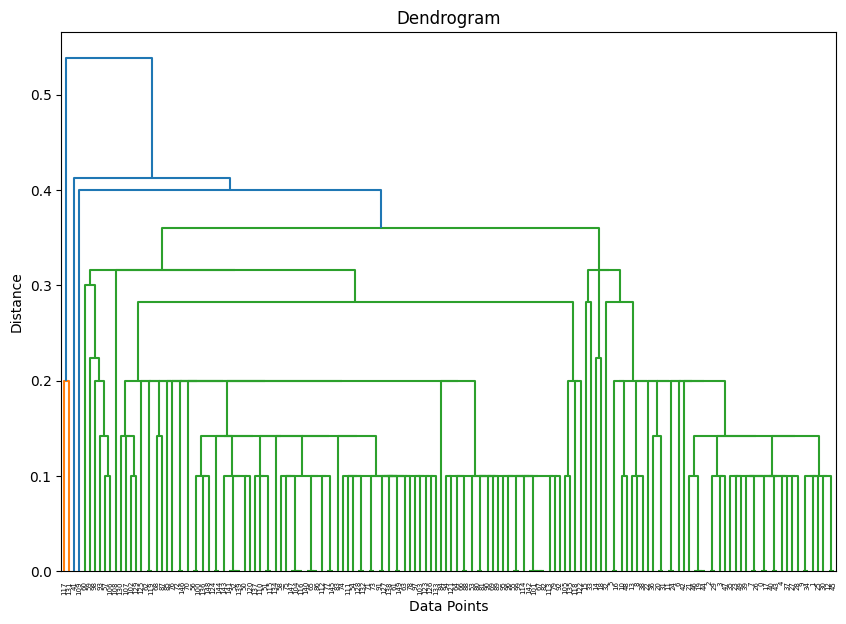

In [42]:
# Perform hierarchical clustering with 'complete' linkage
Z = linkage(X, method='single')
# known as the nearest-neighbor method 
# calculates the distance between the closest members of each pair of clusters
# resulting in long, elongated branches and smaller cluster sizes.

# Plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dendrogram(Z)
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()


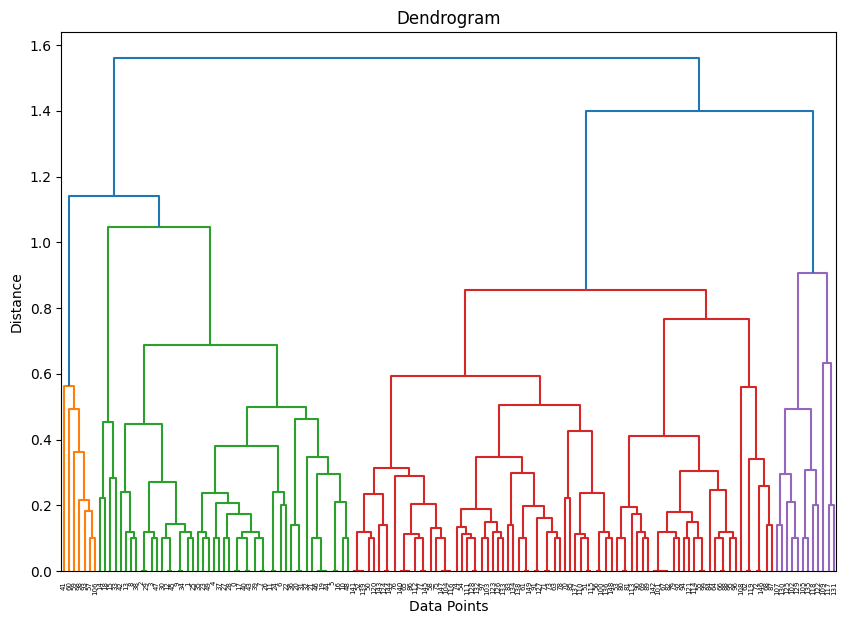

In [43]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering with 'complete' linkage
Z = linkage(X, method='average')
# Calculates the average distance between all pairs of members from different clusters. 
# Resulting in more balanced cluster sizes compared to the "single" method.

# Plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dendrogram(Z)
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()
